In [173]:
#libraries
import numpy as np      #To handle mathematical calculations or arrays of data, e.g., blood sugar levels or patient data.
import pandas as pd     # To load, clean, and analyze your diabetes dataset (CSV or Excel).
import seaborn as sns   #For visualizing patterns in the data, Example: Plotting glucose vs. diabetes status to see trends.
import statsmodels.api as sm     #To analyze relationships between features (like glucose, BMI, etc.) and diabetes risk using regression.
import matplotlib.pyplot as plt  #make basic graphs like line plots, bar charts, and histograms

#prepare data so all numbers have the same scale (if height is in cm, and weight in kg, make them similar)
from sklearn.preprocessing import scale, StandardScaler     

#respectively- splits data into trainings and testing, finds the best settings for the model, tests the model with different splits
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score         

#respectively- Measures how well the model predicts (first two), rec_auc_score- measures how good the model is overall, CReport- Gives details about predictions
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression     #Model- for yes or no predictions
from sklearn.neighbors import KNeighborsClassifier      #check which data point is "closest"
from sklearn.svm import SVC         #for drawing decision lines in data
from sklearn.neural_network import MLPClassifier    #Mimics how the human brain works with neural networks
from sklearn.tree import DecisionTreeClassifier     #Build tree-like decision rules
#Respectively- combines many decision trees for better predictions, Focuses on fixing mistakes of previous models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier     
from sklearn.model_selection import KFold   #splits data into multiple parts for fair testing
import warnings
warnings.simplefilter(action= 'ignore')
import missingno as msng


#STYLING
sns.set()   #activates Seaborn's default graph style
plt.style.use("ggplot")     #makes Matplotlib graphs prettier.
%matplotlib inline   


In [134]:
#Read the datasets

df = pd.read_csv("diabetes.csv")

In [135]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
#supervised or unsupervised || ans: it is supervised -> target column
#Regression or classification || ans: Classification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [138]:
# independent feature -> 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# #dependent feature -> outcome 

#descriptive statistics of the datasets
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [139]:
# (row, columns)
df.shape

(768, 9)

In [140]:
# with percentage || distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

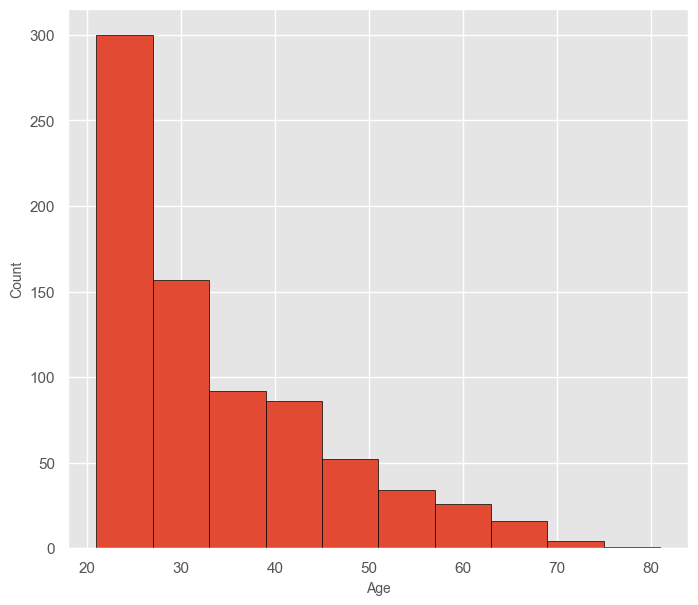

In [141]:
#plot the histogram of the age variable
plt. figure(figsize=(8,7))
plt. xlabel('Age', fontsize=10)
plt. ylabel('Count', fontsize = 10)
df.Age.hist(edgecolor='black')


In [142]:
df.Age.max()

np.int64(81)

In [143]:
df.Age.min()

np.int64(21)

In [144]:
print("MAX AGE: " + str(df.Age.max()))
print("MIN AGE: " + str(df.Age.min()))

MAX AGE: 81
MIN AGE: 21


In [145]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

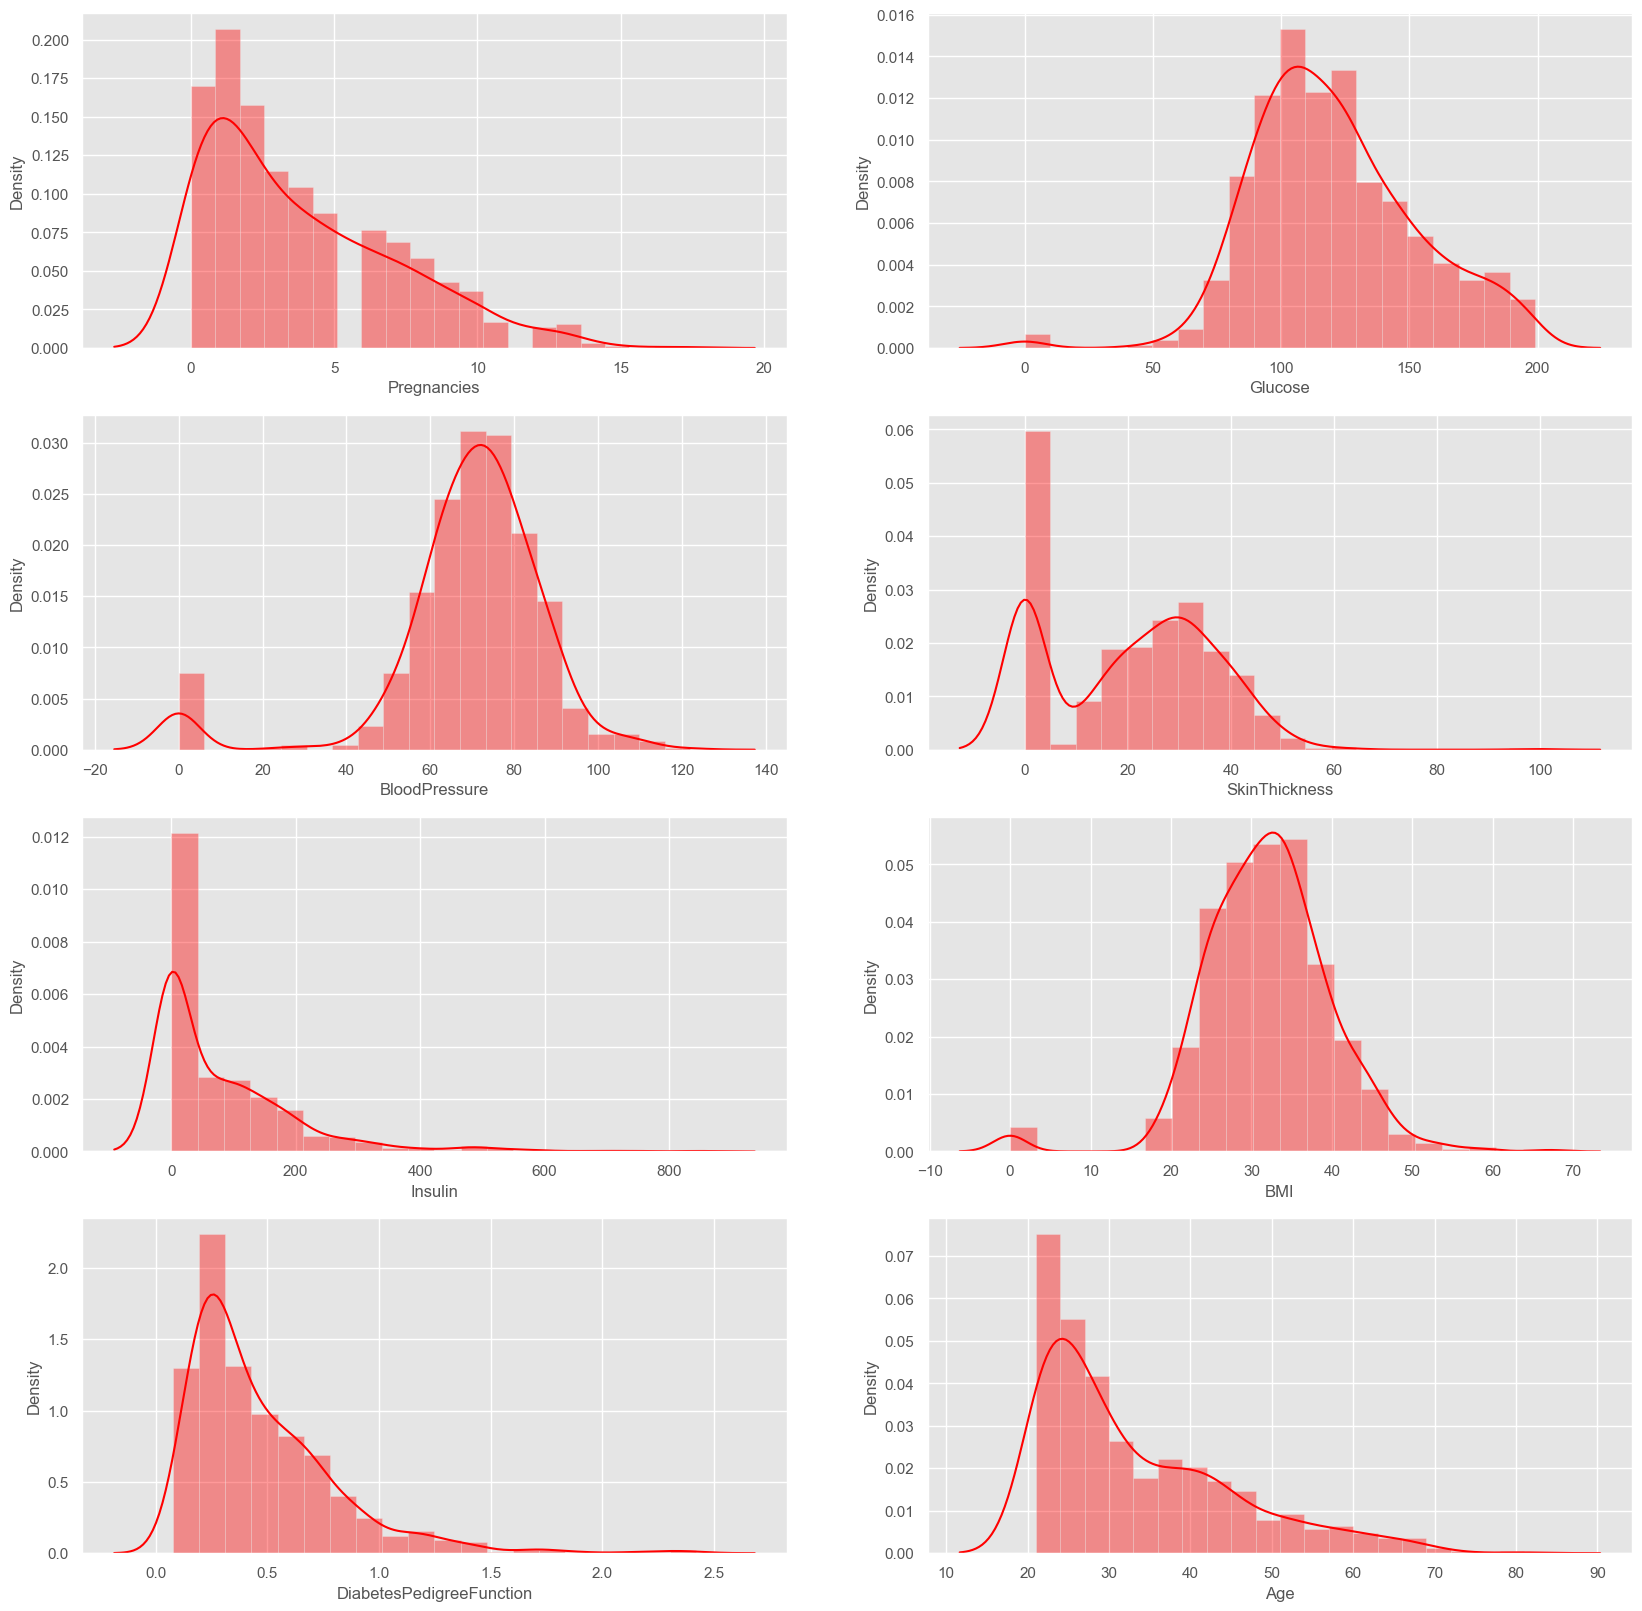

In [146]:
# # density graph
# 4*2=8
# columns = 2 figure
# having 4 row
# [0,0], [0,1]
# [1,0], [1,1]


fig,ax = plt. subplots(4,2, figsize= (20,20))
sns.distplot(df.Pregnancies, bins = 20, ax = ax[0,0], color= "red")
sns.distplot(df.Glucose, bins = 20, ax = ax[0,1], color= "red")
sns.distplot(df.BloodPressure, bins = 20, ax = ax[1,0], color= "red")
sns.distplot(df.SkinThickness, bins = 20, ax = ax[1,1], color= "red")
sns.distplot(df.Insulin, bins = 20, ax = ax[2,0], color= "red")
sns.distplot(df.BMI, bins = 20, ax = ax[2,1], color= "red")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax = ax[3,0], color= "red")
sns.distplot(df.Age, bins = 20, ax = ax[3,1], color= "red")



In [147]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [148]:
df.groupby("Outcome").agg({"Pregnancies":'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


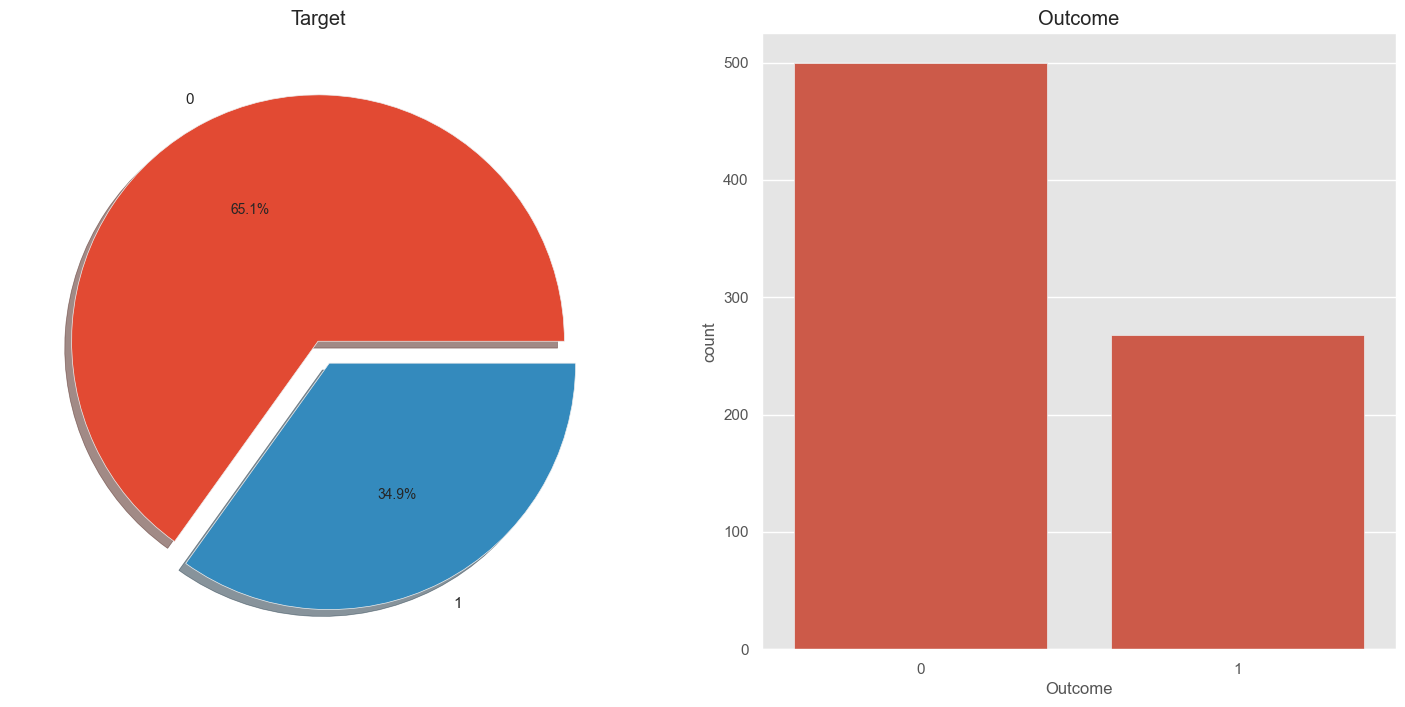

In [149]:
# df.Outcome.value_counts()*100/len(df)
# Visualization
# 0>healthy
# 1>diabetes

f, ax = plt.subplots(1,2, figsize=(18,8))
df.Outcome.value_counts().plot.pie(explode= [0,0.1], autopct = "%1.1f%%", ax=ax[0], shadow = True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot(x= "Outcome", data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()


In [150]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


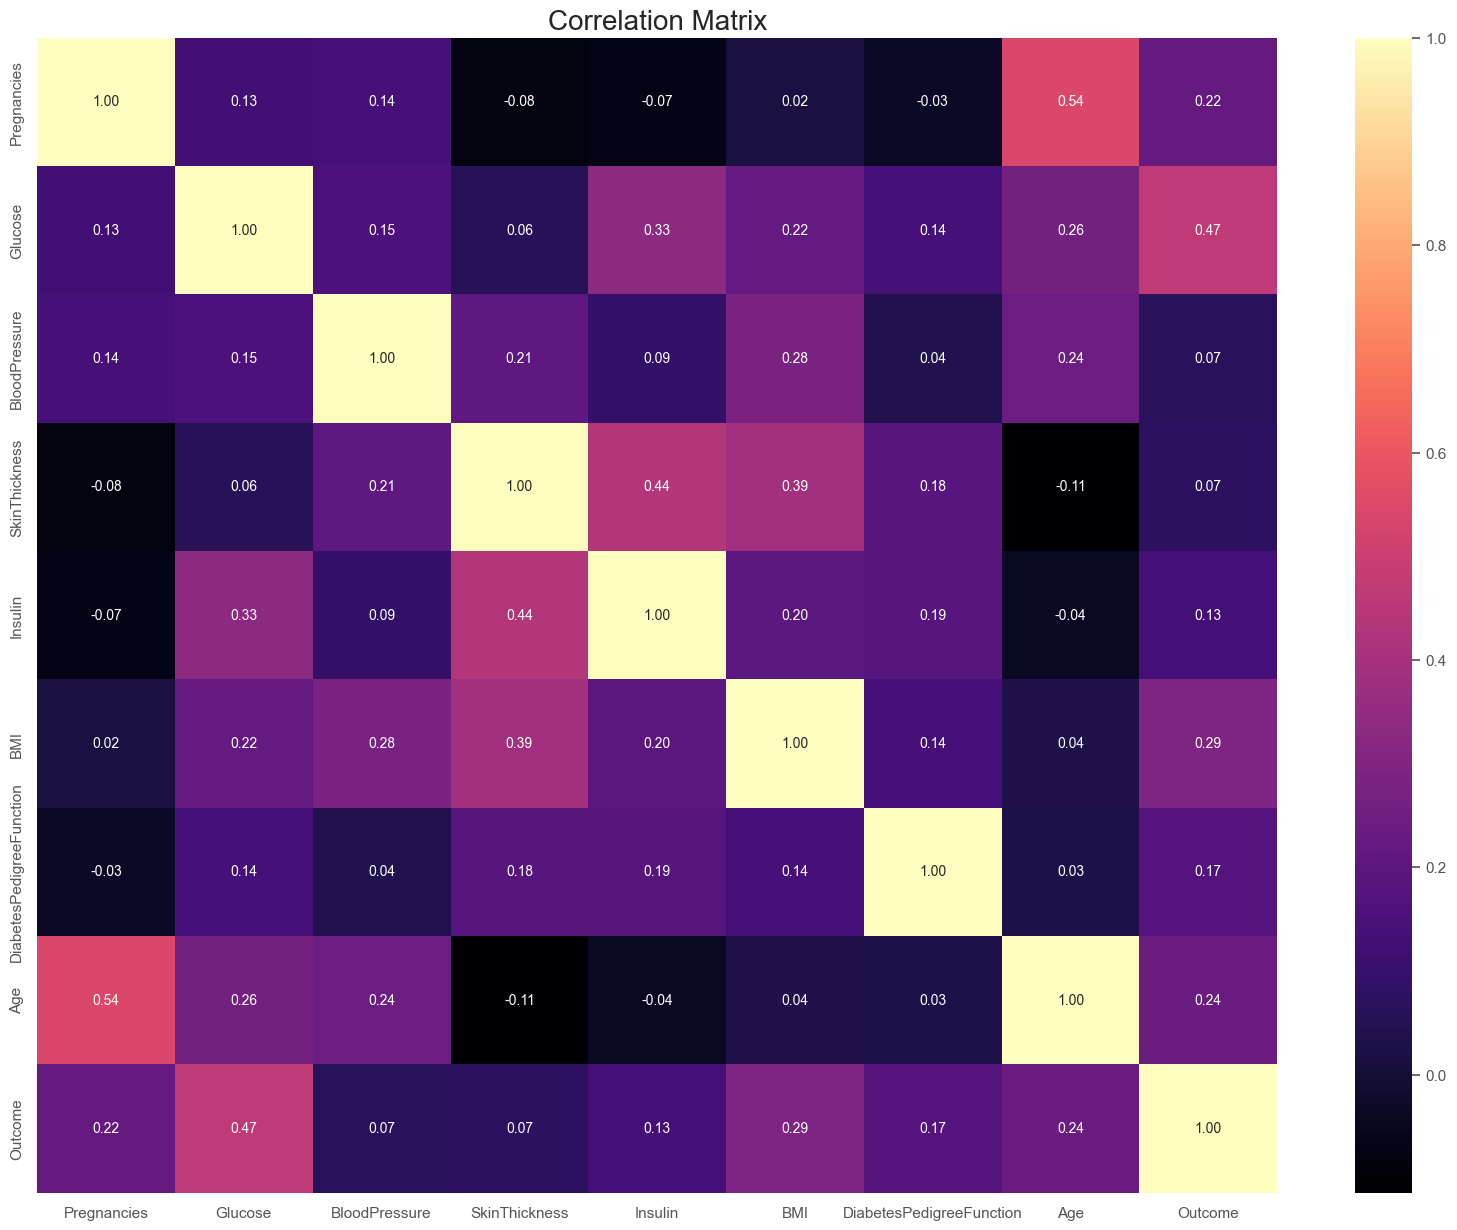

In [165]:
f, ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

In [167]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [169]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [170]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [172]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

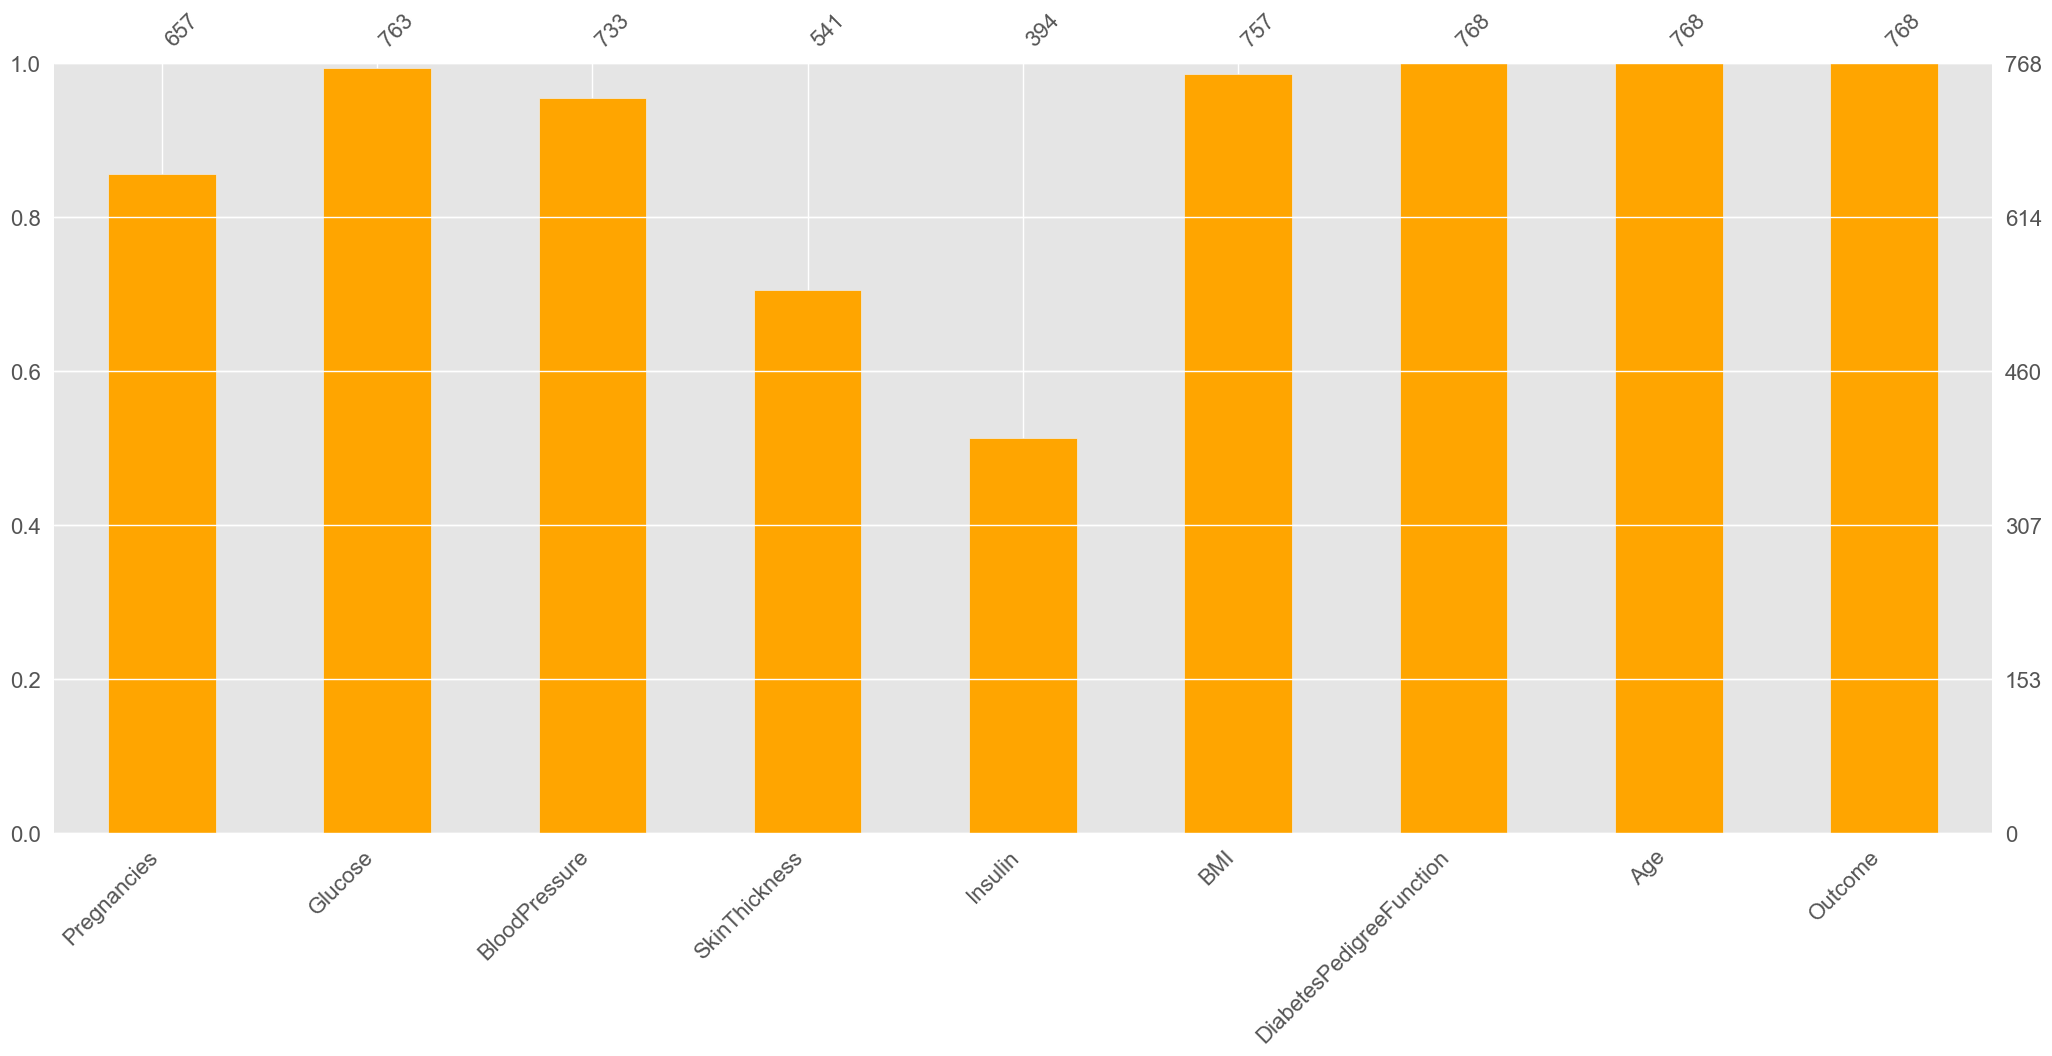

In [177]:
msng.bar(df, color= "orange")